(B) Classify CIFAR 10 images with a CNN model but study the effect on the performance by varying the following modeling aspects:

1) Batch Normalization and Dropout
3) Number of convolution and pooling layers
4) Activation function

2025-05-26 15:50:58.905414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748289058.927099  401376 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748289058.933438  401376 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748289058.949891  401376 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748289058.949926  401376 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748289058.949928  401376 computation_placer.cc:177] computation placer alr

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Training model 1 with config: {'num_conv_layers': 4, 'activation': 'relu', 'use_batch_norm': True, 'dropout_rate': 0.25}


/home/a.hasmukhkumarjain/.conda/envs/csye7380_tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-26 15:51:09.914363: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.3778 - loss: 1.8678 - val_accuracy: 0.5730 - val_loss: 1.2259
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6287 - loss: 1.0587 - val_accuracy: 0.6644 - val_loss: 0.9567
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.7154 - loss: 0.8062 - val_accuracy: 0.7560 - val_loss: 0.7039
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.7636 - loss: 0.6775 - val_accuracy: 0.7744 - val_loss: 0.6544
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.7930 - loss: 0.5966 - val_accuracy: 0.7955 - val_loss: 0.6045
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.8128 - loss: 0.5399 - val_accuracy: 0.8191 - val_loss: 0.5426
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.8316 - loss: 0.4868 - val_accuracy: 0.7908 - val_loss: 0.6312
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.8443 - loss: 0.4477 - 

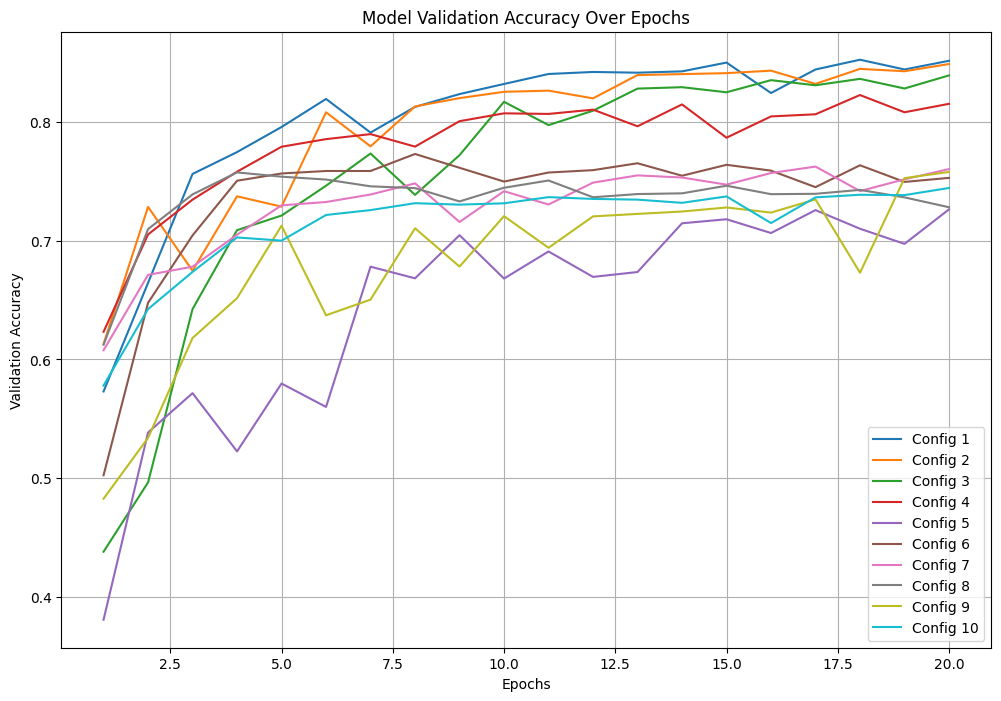

,Config,Num Conv Layers,Activation,Batch Norm,Dropout Rate,Final Train Accuracy,Final Val Accuracy
0,1,4,relu,True,0.25,0.93714,0.8512
1,2,3,relu,True,0.25,0.92888,0.8485
2,3,4,relu,True,0.50,0.84076,0.8389
3,4,2,relu,True,0.25,0.94836,0.8150
4,5,4,tanh,True,0.25,0.73384,0.7262
5,6,4,relu,False,0.00,0.95688,0.7527
6,7,3,tanh,False,0.25,0.75466,0.7601
7,8,2,relu,False,0.00,0.98652,0.7280
8,9,3,tanh,True,0.00,0.89492,0.7577
9,10,2,tanh,False,0.25,0.80810,0.7442


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
def prepare_data():
    # Load dataset into training and testing sets
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0
    y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)
    return X_train, y_train, X_test, y_test

# Define model architecture dynamically
def build_model(num_conv_layers, activation, use_batch_norm, dropout_rate):
    model = models.Sequential()
    for i in range(num_conv_layers):
        filters = 32 * (2**i)
        model.add(layers.Conv2D(filters, (3, 3), padding='same', activation=activation, input_shape=(32, 32, 3) if i == 0 else None))
        if use_batch_norm:
            model.add(layers.BatchNormalization())
        model.add(layers.Conv2D(filters, (3, 3), padding='same', activation=activation))
        if use_batch_norm:
            model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((2, 2)))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=activation))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define all 10 hyperparameter configurations
configs = [
    {'num_conv_layers': 4, 'activation': 'relu', 'use_batch_norm': True, 'dropout_rate': 0.25},
    {'num_conv_layers': 3, 'activation': 'relu', 'use_batch_norm': True, 'dropout_rate': 0.25},
    {'num_conv_layers': 4, 'activation': 'relu', 'use_batch_norm': True, 'dropout_rate': 0.50},
    {'num_conv_layers': 2, 'activation': 'relu', 'use_batch_norm': True, 'dropout_rate': 0.25},
    {'num_conv_layers': 4, 'activation': 'tanh', 'use_batch_norm': True, 'dropout_rate': 0.25},
    {'num_conv_layers': 4, 'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': 0.0},
    {'num_conv_layers': 3, 'activation': 'tanh', 'use_batch_norm': False, 'dropout_rate': 0.25},
    {'num_conv_layers': 2, 'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': 0.0},
    {'num_conv_layers': 3, 'activation': 'tanh', 'use_batch_norm': True, 'dropout_rate': 0.0},
    {'num_conv_layers': 2, 'activation': 'tanh', 'use_batch_norm': False, 'dropout_rate': 0.25}
]

# Training settings
batch_size = 64
epochs = 20

X_train, y_train, X_test, y_test = prepare_data()
histories = []

# Train models based on configurations
for i, config in enumerate(configs):
    print(f"\nTraining model {i+1} with config: {config}")
    model = build_model(**config)

    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_test, y_test),
        verbose=1
    )

    histories.append({'config': config, 'history': history})

# Create results table
results = []
for i, record in enumerate(histories):
    config = record['config']
    final_train_acc = record['history'].history['accuracy'][-1]
    final_val_acc = record['history'].history['val_accuracy'][-1]
    results.append({
        'Config': i + 1,
        'Num Conv Layers': config['num_conv_layers'],
        'Activation': config['activation'],
        'Batch Norm': config['use_batch_norm'],
        'Dropout Rate': config['dropout_rate'],
        'Final Train Accuracy': final_train_acc,
        'Final Val Accuracy': final_val_acc
    })

df_results = pd.DataFrame(results)
print("\nFinal Model Performance Summary:")
print(df_results)

# Plot validation accuracy trends for all models
plt.figure(figsize=(12, 8))
for i, record in enumerate(histories):
    plt.plot(range(1, epochs + 1), record['history'].history['val_accuracy'], label=f"Config {i+1}")
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Model Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
display(df_results)
